In [1]:
!pip install pandas numpy matplotlib  seaborn scikit-learn metrics

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/841.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/841.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/841.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/841.7 kB ? eta -:--:--
   - ------------------------------------- 41.0/841.7 kB 219.4 kB/s eta 0:00:04
   -- ------------------------------------ 61.4/841.7 kB 234.9 kB/s eta 0:00:04
   --- ----------------------------------- 71.7/841.7 kB 245.8 kB/s eta 0:00:04
   ---- --------------------------------- 102.4/841.7 kB 295.4 kB/s eta 0:00:03
   ----- -------------------------------- 122.9/841.7 kB 343.4 kB/s eta 0:00:03
   ------ ------------------------------- 153.6/841.7 kB 353.1 kB/s eta 0:00:02
   ------- ------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
black 24.4.2 requires pathspec>=0.9.0, but you have pathspec 0.5.5 which is incompatible.
ipython 8.25.0 requires pygments>=2.4.0, but you have pygments 2.2.0 which is incompatible.
jupyterlab-pygments 0.1.2 requires pygments<3,>=2.4.1, but you have pygments 2.2.0 which is incompatible.
nbconvert 7.10.0 requires pygments>=2.4.1, but you have pygments 2.2.0 which is incompatible.
rich 13.3.5 requires pygments<3.0.0,>=2.13.0, but you have pygments 2.2.0 which is incompatible.
sphinx 7.3.7 requires Pygments>=2.14, but you have pygments 2.2.0 which is incompatible.


# Setup Environment and Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set up visualizations
sns.set(style="whitegrid")

print("Libraries imported successfully.")




# pandas and numpy: For data manipulation.
# matplotlib and seaborn: For creating visualizations.
# sklearn: For machine learning models and metrics.
# sns.set(): Sets the style for seaborn visualizations.

Libraries imported successfully.


# Load and Explore the Dataset

In [5]:
# Simulated dataset creation
data = {
    'PatientID': range(1, 101),
    'Age': np.random.randint(20, 80, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'BloodPressure': np.random.randint(80, 180, 100),
    'Cholesterol': np.random.randint(150, 300, 100),
    'BloodSugar': np.random.randint(70, 200, 100),
    'Disease': np.random.choice([0, 1], 100)  # 0: No, 1: Yes
}

df = pd.DataFrame(data)

# Display first few rows
print("Dataset Preview:")
print(df.head())




# data: Created a simulated dataset with patient features.
# pd.DataFrame(): Converts the dictionary to a DataFrame.
# head(): Displays the first few rows of the dataset.

Dataset Preview:
   PatientID  Age  Gender  BloodPressure  Cholesterol  BloodSugar  Disease
0          1   76    Male            129          271         183        0
1          2   43  Female            145          249          93        0
2          3   40  Female            125          218         127        0
3          4   65  Female            154          260         144        0
4          5   30  Female            114          245         188        0


# Data Preprocessing

In [7]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split features and target variable
X = df.drop(['PatientID', 'Disease'], axis=1)
y = df['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed.")



# map(): Encodes categorical variable 'Gender' to numerical values.
# drop(): Removes non-feature columns.
# train_test_split(): Splits data into training and testing sets.
# StandardScaler(): Scales features to have zero mean and unit variance.

Data preprocessing completed.


# Train a Machine Learning Model

In [9]:
# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

print("Model trained successfully.")



# RandomForestClassifier(): Initializes the RandomForest model.
# fit(): Trains the model on the training data.

Model trained successfully.


# Evaluate Model Performance

In [11]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)




# predict(): Predicts labels for the test data.
# confusion_matrix(): Computes the confusion matrix.
# classification_report(): Provides precision, recall, and F1-score metrics.


Confusion Matrix:
[[9 7]
 [9 5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        16
           1       0.42      0.36      0.38        14

    accuracy                           0.47        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.46      0.47      0.46        30



# Scatter Plot

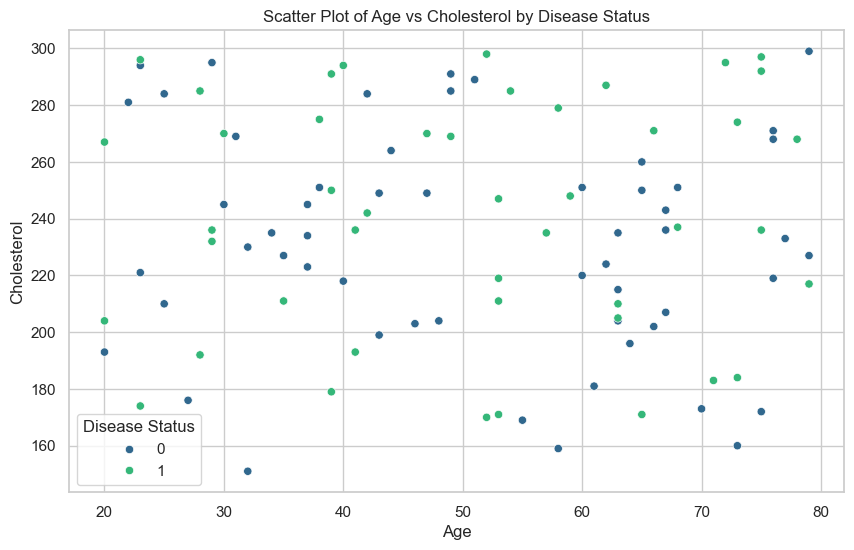

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol', hue='Disease', data=df, palette='viridis')
plt.title('Scatter Plot of Age vs Cholesterol by Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Disease Status')
plt.grid(True)
plt.show()


# Bar Graph

C:\Users\pradu\AppData\Local\Temp\ipykernel_8400\1527811988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='coolwarm')


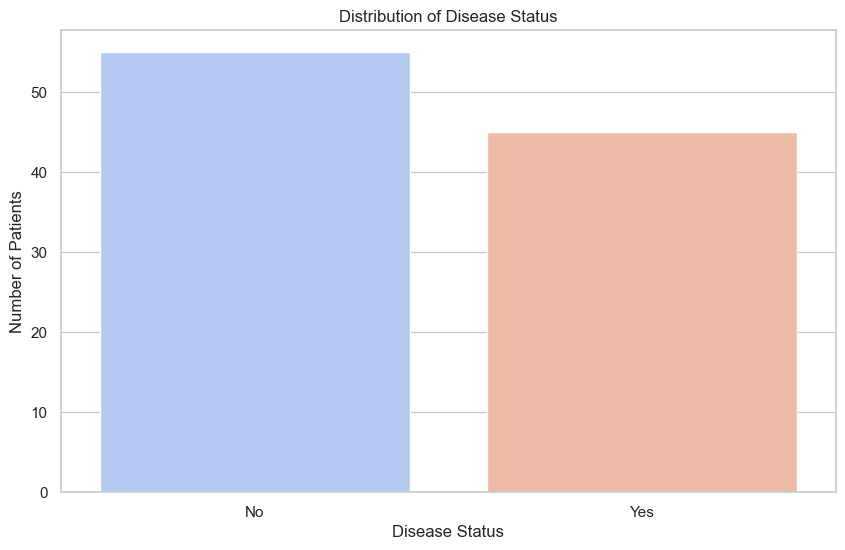

In [15]:
plt.figure(figsize=(10, 6))
disease_counts = df['Disease'].value_counts()
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='coolwarm')
plt.title('Distribution of Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


# Pie Chart

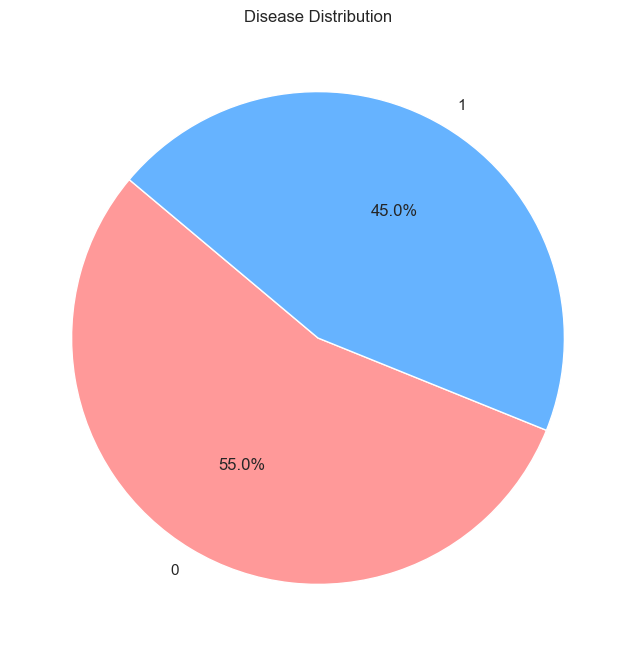

In [17]:
plt.figure(figsize=(8, 8))
disease_distribution = df['Disease'].value_counts()
plt.pie(disease_distribution, labels=disease_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Disease Distribution')
plt.show()




# Scatter Plot: Shows the relationship between age and cholesterol levels, color-coded by disease status.
# Bar Graph: Displays the count of patients with and without the disease.
# Pie Chart: Visualizes the percentage distribution of disease status.


# Predicting and Visualizing New Data

In [19]:
# Simulate new patient data
new_patient = pd.DataFrame({
    'Age': [45],
    'Gender': [1],  # Female
    'BloodPressure': [120],
    'Cholesterol': [250],
    'BloodSugar': [90]
})

# Scale new patient data
new_patient_scaled = scaler.transform(new_patient)

# Predict disease status
new_prediction = clf.predict(new_patient_scaled)
print(f"Predicted Disease Status for New Patient: {'Yes' if new_prediction[0] == 1 else 'No'}")



# pd.DataFrame(): Creates a DataFrame for new patient data.
# transform(): Scales the new patient data using the trained scaler.
# predict(): Predicts disease status for the new patient.

Predicted Disease Status for New Patient: No


# Save and Load the Model

In [21]:
import joblib

# Save the trained model
joblib.dump(clf, 'hospital_model.pkl')
print("Model saved successfully.")

# Load the model
loaded_model = joblib.load('hospital_model.pkl')
print("Model loaded successfully.")



# joblib.dump(): Saves the trained model to a file.
# joblib.load(): Loads the saved model from the file.

Model saved successfully.
Model loaded successfully.
